SCARCASM

Loading Datasets

In [29]:
import json

file = "C:\\Users\\sound\\Downloads\\archivescarcasm\\Sarcasm_Headlines_Dataset_v2.json"
datastore = []

with open(file, 'r') as f:
    for line in f:
        datastore.append(json.loads(line))

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    


Parameters

In [30]:
vocab_size = 10000
emb_dim = 16
max_length = 30
trunc = 'post'
padding_type = 'post'
oov_tokn = '<OOV>'
training_size = 20000

Spiliting Data

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels =labels[0:training_size]
testing_labels = labels[training_size:]

Tokenizing and Padding

In [33]:
tokenizer = Tokenizer(num_words =vocab_size, oov_token =oov_tokn )
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length, padding = padding_type, truncating =trunc)

In [38]:
import numpy as np

training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

Model

In [39]:
import tensorflow as tf


model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, emb_dim, input_length = max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
  loss ='binary_crossentropy',
  optimizer ='adam',
  metrics =['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 16)            160000    
                                                                 
 global_average_pooling1d_5  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training

In [40]:
no_epochs = 30

history = model.fit(training_padded, training_labels, epochs=no_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


625/625 - 4s - loss: 0.5665 - accuracy: 0.7106 - val_loss: 0.3915 - val_accuracy: 0.8320 - 4s/epoch - 7ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3164 - accuracy: 0.8722 - val_loss: 0.3296 - val_accuracy: 0.8579 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2387 - accuracy: 0.9069 - val_loss: 0.3325 - val_accuracy: 0.8552 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1934 - accuracy: 0.9280 - val_loss: 0.3479 - val_accuracy: 0.8473 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.1628 - accuracy: 0.9401 - val_loss: 0.3670 - val_accuracy: 0.8488 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1372 - accuracy: 0.9510 - val_loss: 0.4096 - val_accuracy: 0.8414 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1187 - accuracy: 0.9599 - val_loss: 0.4523 - val_accuracy: 0.8322 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1031 - accuracy: 0.9650 - val_loss: 0.4818 - val_accuracy: 0.8314 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2

Accuracy and Loss

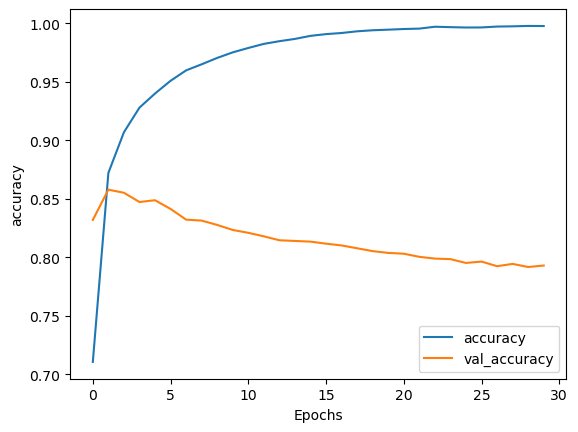

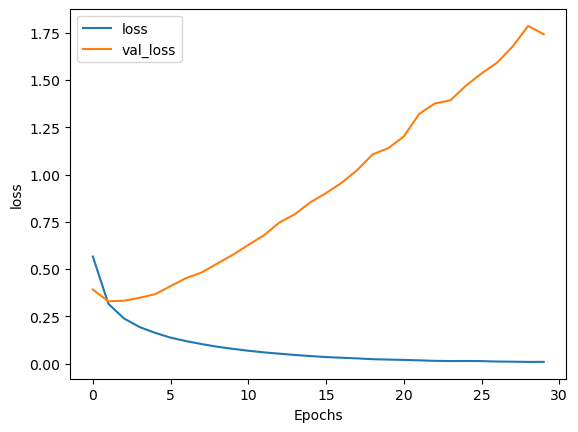

In [43]:
import matplotlib.pyplot as plt

def plotg(history, name):
  plt.plot(history.history[name])
  plt.plot(history.history['val_'+name])
  plt.xlabel("Epochs")
  plt.ylabel(name)
  plt.legend([name, 'val_'+name])
  plt.show()

plotg(history, 'accuracy')
plotg(history, 'loss')

In [49]:
# Assuming you have trained your model and stored it in the 'model' variable

# Define the path where you want to save your model
#model_path = "sarcasm_detection_model.h5"

# Save the model
#model.save(model_path)

#print("Model saved successfully at:", model_path)

#from tensorflow.keras.models import load_model

#loaded_model = load_model("sarcasm_detection_model.h5")


Model saved successfully at: sarcasm_detection_model.h5


c:\Users\sound\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction

In [55]:
def predict_sarcasm(prompt):
    # Tokenize and preprocess the prompt
    sequence = tokenizer.texts_to_sequences([prompt])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc)
    
    # Predict using the model
    prediction = model.predict(padded_sequence)[0][0]
    
    # Determine if the prediction indicates sarcasm
    is_sarcastic = prediction >= 0.5
    
    return is_sarcastic, prediction

# Prompt the user for input and test the model
user_input = input("Enter a headline to test for sarcasm: ")

is_sarcastic, sarcasm_score = predict_sarcasm(user_input)

print(user_input)

if is_sarcastic:
    print("\nThe input headline is sarcastic.")
else:
    print("\nThe input headline is not sarcastic.")
print("Sarcasm Score:", sarcasm_score)

1/1 [==============================] - 0s 27ms/step
Man found dead in graveyard

The input headline is sarcastic.
Sarcasm Score: 0.9979974
